# **Hospital Length of Stay (LOS) Prediction**


## **Context:**

Hospital management is an area that has gained a lot of attention, especially recently during the COVID-19 pandemic. Inefficient distribution of resources like beds and ventilators might lead to a lot of complications. However, this can be mitigated by **predicting the length of stay (LOS) of a patient before getting admitted**. Once this is determined, the hospital can allocate a suitable amount of staff and resources to be planned in accordance with that.

HealthPlus Hospital has been incurring a lot of losses in revenue and life due to its inefficient hospital management system. They have been unsuccessful in allocating beds, equipment and hospital staff in an efficient manner. 

**A machine learning system that could estimate the length of stay (LOS) of an incoming patient would help solve this problem for hospital management to a great extent.**

## **Objective:**

As a Data Scientist, you have been hired by HealthPlus to analyze their data, find out **what factors affect the LOS the most and come up with a machine learning model which can predict the LOS of a patient** using the data available during admission and after running a few tests. You will also need to **bring about useful business insights from the data that can potentially help the hospital improve their health care infrastructure planning and subsequent revenue.**

## **Data Dictionary:**

The dataset contains various informative features recorded during the time of admission of the patient. 

The detailed data dictionary is given below:


* **patientid**: Patient ID
* **Age**: Range of age of the patient
* **gender**: Gender of the patient
* **Type of Admission**: Trauma, emergency or urgent
* **Severity of Illness**: Extreme, moderate, or minor
* **health_condition**s: Any previous health conditions suffered by the patient
* **Visitors with Patient**: The number of patients who accompany the patient
* **Insurance**: Does the patient have health insurance or not?
* **Admission_Deposit**: The deposit paid by the patient during admission
* **Stay (in days)**: The number of days that the patient has stayed in the hospital. This is the **target variable.**
* **Available Extra Rooms in Hospital**: The number of rooms available during admission
* **Department**: The department which will be treating the patient
* **Ward_Facility_Code**: The code of the ward facility in which the patient will be admitted
* **doctor_name**: The doctor who will be treating the patient
* **staff_available**: The number of staff who are not occupied at the moment in the ward

## **Approach to solve the problem:**

1. Import the necessary libraries.
2. Read the dataset and get an overview.
3. Exploratory data analysis. a) Univariate b) Bivariate.
4. Data preprocessing if any.
5. Define the performance metric and build ML models.
6. Compare models and determine the best one.
7. Observations and business insights.

## **Importing the required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Read the healthcare dataset file
data=pd.read_csv("healthcare_data.csv")

In [ ]:
# Copying data to another variable to avoid any changes to original data
same_data = data.copy()

## **Data Overview**

In [ ]:
# View the first 5 rows of the dataset
data.head()

Available Extra Rooms in Hospital  Department Ward_Facility_Code  \
0                                  4  gynecology                  D   
1                                  4  gynecology                  B   
2                                  2  gynecology                  B   
3                                  4  gynecology                  D   
4                                  2  anesthesia                  E   

  doctor_name  staff_available  patientid    Age  gender Type of Admission  \
0   Dr Sophia                0      33070  41-50  Female            Trauma   
1   Dr Sophia                2      34808  31-40  Female            Trauma   
2   Dr Sophia                8      44577  21-30  Female            Trauma   
3   Dr Olivia                7       3695  31-40  Female            Urgent   
4     Dr Mark               10     108956  71-80    Male            Trauma   

  Severity of Illness health_conditions  Visitors with Patient Insurance  \
0             Extreme          Diabetes                      4       Yes   
1               Minor     Heart disease                      2        No   
2             Extreme          Diabetes                      2       Yes   
3            Moderate              None                      4        No   
4            Moderate          Diabetes                      2        No   

   Admission_Deposit  Stay (in days)  
0        2966.408696               8  
1        3554.835677               9  
2        5624.733654               7  
3        4814.149231               8  
4        5169.269637              34

In [ ]:
# View the last 5 rows of the dataset
data.tail()

Available Extra Rooms in Hospital    Department Ward_Facility_Code  \
499995                                  4    gynecology                  F   
499996                                 13    gynecology                  F   
499997                                  2    gynecology                  B   
499998                                  2  radiotherapy                  A   
499999                                  3    gynecology                  F   

       doctor_name  staff_available  patientid    Age  gender  \
499995    Dr Sarah                2      43001  11-20  Female   
499996   Dr Olivia                8      85601  31-40  Female   
499997    Dr Sarah                3      22447  11-20  Female   
499998     Dr John                1      29957  61-70  Female   
499999   Dr Sophia                3      45008  41-50  Female   

       Type of Admission Severity of Illness    health_conditions  \
499995            Trauma               Minor  High Blood Pressure   
499996         Emergency            Moderate                Other   
499997         Emergency            Moderate  High Blood Pressure   
499998            Trauma             Extreme             Diabetes   
499999            Trauma            Moderate        Heart disease   

        Visitors with Patient Insurance  Admission_Deposit  Stay (in days)  
499995                      3        No        4105.795901              10  
499996                      2        No        4631.550257              11  
499997                      2        No        5456.930075               8  
499998                      2        No        4694.127772              23  
499999                      4       Yes        4713.868519              10

In [ ]:
# Understanding the shape of the data
data.shape

(500000, 15)

- The dataset has **5,00,000 rows and 15 columns**

In [ ]:
# Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  500000 non-null  object 
 11  Visitors with Patient              5000

**Observations:**

-  Available Extra Rooms in Hospital , staff_available, patientid, Visitors with Patient, Admission_Deposit, and Stay (in days) are the variables of the **numeric data type**. The rest of the columns are of the **object data type**.
- The number of non-null values is the same as the total number of entries in the data i.e. **there are no null values.**
- The column **patientid** is an identifier for patients in the data. 

In [ ]:
# Checking for duplicate values in the Data
data.duplicated().sum()

0

**Observations:** 
- The data has unique rows only, and no duplicate entries. There is no need to remove any rows.

In [ ]:
# To view patientid and the number of times they have visited the hospital
data['patientid'].value_counts()

126719    21
125695    21
44572     21
126623    21
125625    19
          ..
37634      1
91436      1
118936     1
52366      1
105506     1
Name: patientid, Length: 126399, dtype: int64

**Observations:**
- **The maximum number of times the same patient was admitted to the hospital is 21, and minimum is 1.**

In [ ]:
# Checking the descriptive statistics of the columns
data.describe().T

count          mean           std  \
Available Extra Rooms in Hospital  500000.0      3.638800      2.698124   
staff_available                    500000.0      5.020470      3.158103   
patientid                          500000.0  63150.519058  41689.479956   
Visitors with Patient              500000.0      3.549414      2.241054   
Admission_Deposit                  500000.0   4722.315734   1047.324220   
Stay (in days)                     500000.0     12.381062      7.913174   

                                           min           25%           50%  \
Available Extra Rooms in Hospital     0.000000      2.000000      3.000000   
staff_available                       0.000000      2.000000      5.000000   
patientid                         -3269.000000  25442.000000  57864.000000   
Visitors with Patient                 0.000000      2.000000      3.000000   
Admission_Deposit                  1654.005148   4071.714532   4627.003792   
Stay (in days)                        3.000000      8.000000      9.000000   

                                             75%           max  
Available Extra Rooms in Hospital       4.000000      24.00000  
staff_available                         8.000000      10.00000  
patientid                          103392.000000  134400.00000  
Visitors with Patient                   4.000000      32.00000  
Admission_Deposit                    5091.612717   10104.72639  
Stay (in days)                         11.000000      51.00000

**Observations :**

* There are around **3 rooms available in the hospital on average** and there are times when the hospital is full and there are no rooms available. The **maximum number of rooms available in the hospital has been 24**.
* **On average there are around 5 staff personnel available to treat the new patients** but it can also be zero at times. The maximum staff that has been available in the hospital is 10.
* **On average around 3 visitors accompany the patient.** Some patients come on their own (minimum zero) and a few cases have even had 32 visitors. It would be interesting to see if there is any correlation between the number of visitors and the severity of the patient's condition.
* **The average admission deposit is around 4722 dollars, and a minimum of 1654 dollars is paid on every admission.**
* **Patient's stay** has a large range from 3 to 51 days. The median length of stay is 9 days, so there are clearly outliers in this variable's values.


In [ ]:
# List of all important categorical variables
cat_col = ["Department", "Type of Admission", 'Severity of Illness', 'gender', 'Insurance', 'health_conditions', 'doctor_name', "Ward_Facility_Code", "Age"]

# Printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(1))
    print("-" * 50)

gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: Department, dtype: float64
--------------------------------------------------
Trauma       0.621072
Emergency    0.271568
Urgent       0.107360
Name: Type of Admission, dtype: float64
--------------------------------------------------
Moderate    0.560394
Minor       0.263074
Extreme     0.176532
Name: Severity of Illness, dtype: float64
--------------------------------------------------
Female    0.74162
Male      0.20696
Other     0.05142
Name: gender, dtype: float64
--------------------------------------------------
Yes    0.78592
No     0.21408
Name: Insurance, dtype: float64
--------------------------------------------------
None                   0.303776
Other                  0.188822
High Blood Pressure    0.158804
Diabetes               0.147288
Asthama                0.131028
Heart disease          0.070282
Name: hea

**Observations :**

- **The majority of patients (~82%) are admitted to the hospital with moderate and minor illnesses**, which is understandable as those conditions tend to be more common than extreme illnesses.
- The **Gynecology department gets the highest number of patients (~68%)** in the hospital, while the patients in the Surgery department are the smallest percentage (~1%) of overall patients.
- **Ward A and C accommodate the least number of patients (~12%).** These might be wards reserved for patients with extreme illnesses or those who need surgery. It would be interesting to see if patients from these wards also stay for a longer duration.
- **The majority of patients belong to the age group of 21-50 (\~75%) and are women (~75%).** The high percentage of patients in the Gynecology department of the hospital makes sense in light of this.
- **High Blood pressure and Diabetes** are the most common health conditions.

## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### **Length of Stay (LOS)**

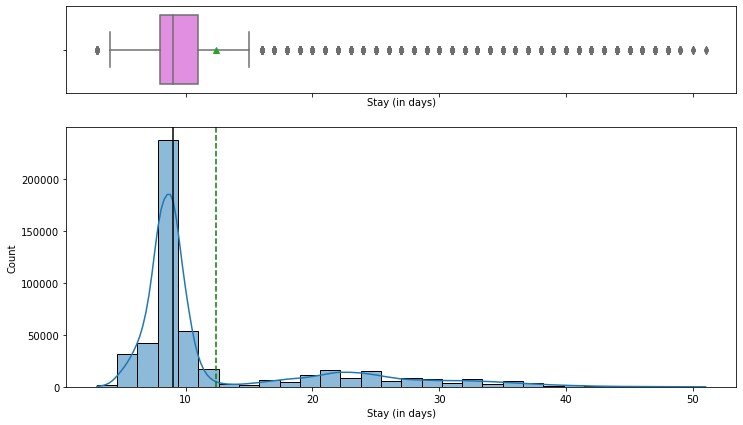

In [ ]:
histogram_boxplot(data, "Stay (in days)", kde=True, bins=30)

**Observations:**

- There are a **fewer number of patients staying for over 10 days in the hospital, and very few who stay for more than 40 days**. This might be because the majority of patients are admitted for moderate to minor illnesses. 
- The peak of the distribution shows that most patients stay for 8-9 days in the hospital.

#### **Admission Deposit**

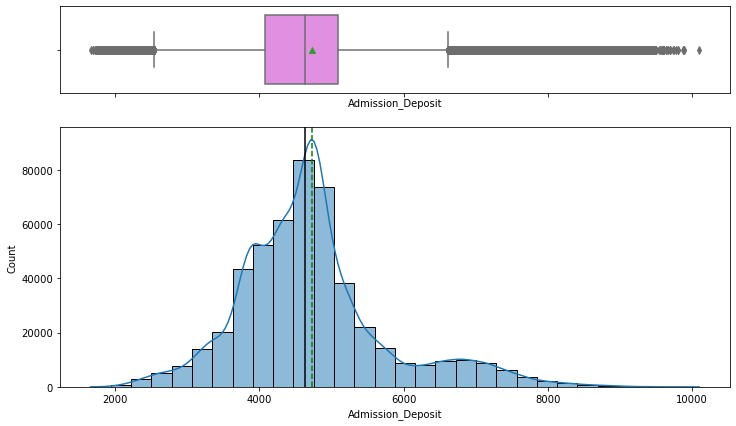

In [ ]:
histogram_boxplot(data, "Admission_Deposit", kde=True, bins=30)

**Observations:**

- The **distribution of the admission fees is close to normal with outliers on both sides**. There are a few patients paying a higher amount of admission fees and a few patients paying a lower amount of admission fees.

#### **Visitors with Patients**

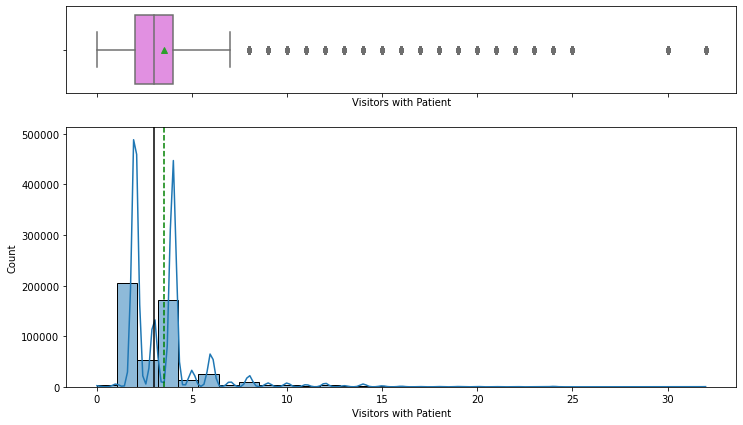

In [ ]:
histogram_boxplot(data, "Visitors with Patient", kde=True, bins=30)

**Observations:**

- The distribution of the number of visitors with the patient is **highly skewed towards the right**.
- **2 and 4 are the most common number of visitors with the patients.**

### **Bivariate Analysis**

<AxesSubplot:>

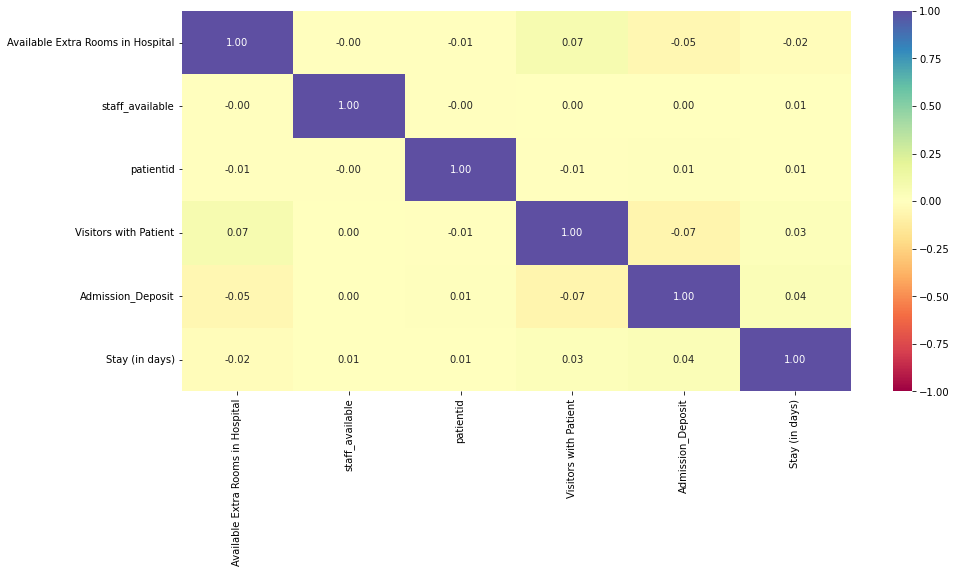

In [ ]:
# Finding the correlation between various columns of the dataset
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f",cmap="Spectral")

**Observations:** 
- The heatmap shows that there is **no pairwise correlation between variables**.
- The continuous variables show no correlation with the target variable (Stay in days) which indicates that the **categorical variables might be more important for this prediction.**

In [ ]:
# function to plot stacked bar plots


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Let's start by checking the distribution of the LOS for the various wards**

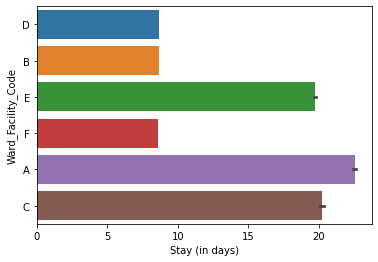

In [ ]:
sns.barplot(y = 'Ward_Facility_Code',x = 'Stay (in days)',data = data)
plt.show()

**Observations:**

- The hypothesis we made earlier is correct i.e. **Wards A and C seem to have the patients staying for the longest duration.**

Department          TB & Chest disease  anesthesia  gynecology  radiotherapy  \
Ward_Facility_Code                                                             
A                                 4709       15611           0         21093   
All                              22890       44179      343478         84315   
B                                    0           0      103885             0   
C                                 1319        4199           0          9079   
D                                    0           0      119055             0   
E                                16862       24369           0         54143   
F                                    0           0      120538             0   

Department          surgery     All  
Ward_Facility_Code                   
A                      5138   46551  
All                    5138  500000  
B                         0  103885  
C                         0   14597  
D                         0  119055  
E            

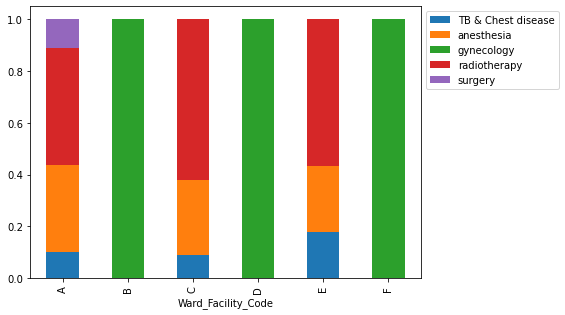

In [ ]:
stacked_barplot(data, "Ward_Facility_Code", "Department")

**Observations:**

- **Ward Facilities B, D and F are dedicated only to the gynecology department.**
- Wards A, C, and E have patients with all the other diseases and patients undergoing surgery seem to be admitted in Ward A only.

**Usually, the more severe the illness, the more the LOS, let's check the distribution of severe patients in various wards**

Severity of Illness  Extreme   Minor  Moderate     All
Ward_Facility_Code                                    
All                    88266  131537    280197  500000
D                      29549   27220     62286  119055
B                      24222   23579     56084  103885
A                      13662    7877     25012   46551
E                      11488   22254     61632   95374
F                       5842   47594     67102  120538
C                       3503    3013      8081   14597
------------------------------------------------------------------------------------------------------------------------


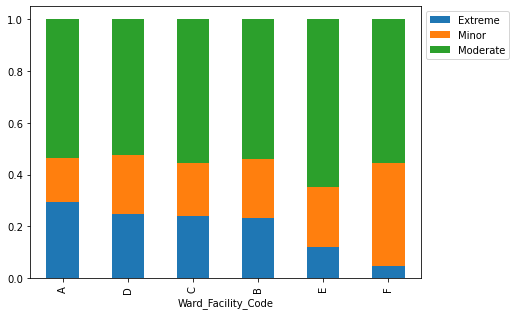

In [ ]:
stacked_barplot(data, "Ward_Facility_Code", "Severity of Illness")

**Observations :**

- Ward A has the most extreme case as well as the longest length of stay in the hospital. It might require more staff and resources in comparison to other wards.
- Ward F has a large number of minor cases and Ward E has large number of moderate cases.

**Age can also be an important factor to find the length of stay. Let's check the same.**

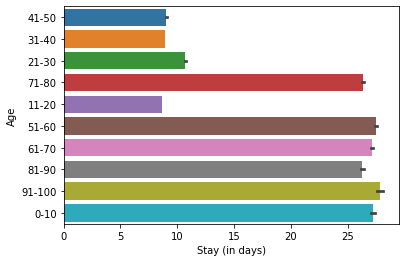

In [ ]:
sns.barplot(y = 'Age',x = 'Stay (in days)',data = data )
plt.show()

**Observations:**

- **Patients aged between 1-10 and 51-100 tend to stay the highest number of days in the hospital.** This might be because the majority of the patients between 21-50 age group seem to get admitted to the gynecology department and patients in age groups 1-10 and 5-100 might be getting admitted due to some other serious illness. 

## **Data Preparation for Model Building**

- Before we proceed to build a model, we'll have to encode categorical features.
- We'll need to separate out the independent variables and dependent variable.
- We'll split the data into train and test to be able to evaluate the model that we train on the training data.

In [ ]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
data = pd.get_dummies(
    data,
    columns=data.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

In [ ]:
# Check the data, after handling categorical data
data

Available Extra Rooms in Hospital  staff_available  patientid  \
0                                       4                0      33070   
1                                       4                2      34808   
2                                       2                8      44577   
3                                       4                7       3695   
4                                       2               10     108956   
...                                   ...              ...        ...   
499995                                  4                2      43001   
499996                                 13                8      85601   
499997                                  2                3      22447   
499998                                  2                1      29957   
499999                                  3                3      45008   

        Visitors with Patient  Admission_Deposit  Stay (in days)  \
0                           4        2966.408696               8   
1                           2        3554.835677               9   
2                           2        5624.733654               7   
3                           4        4814.149231               8   
4                           2        5169.269637              34   
...                       ...                ...             ...   
499995                      3        4105.795901              10   
499996                      2        4631.550257              11   
499997                      2        5456.930075               8   
499998                      2        4694.127772              23   
499999                      4        4713.868519              10   

        Department_anesthesia  Department_gynecology  Department_radiotherapy  \
0                           0                      1                        0   
1                           0                      1                        0   
2                           0                      1                        0   
3                           0                      1                        0   
4                           1                      0                        0   
...                       ...                    ...                      ...   
499995                      0                      1                        0   
499996                      0                      1                        0   
499997                      0                      1                        0   
499998                      0                      0                        1   
499999                      0                      1                        0   

        Department_surgery  Ward_Facility_Code_B  Ward_Facility_Code_C  \
0                        0                     0                     0   
1                        0                     1                     0   
2                        0                     1                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
499995                   0                     0                     0   
499996                   0                     0                     0   
499997                   0                     1                     0   
499998                   0                     0                     0   
499999                   0                     0                     0   

        Ward_Facility_Code_D  Ward_Facility_Code_E  Ward_Facility_Code_F  \
0                          1                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          1                     0                     0   
4                          0                     1                     0

In [ ]:
# Dropping patientid from the data as it is an identifier and will not add value to the analysis
data=data.drop(columns=["patientid"])

In [ ]:
# Separating independent variables and the target variable
x=data.drop('Stay (in days)',axis=1)

y=data['Stay (in days)'] 

In [ ]:
# Splitting the dataset into train and test datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=1)

In [ ]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)


Shape of Training set :  (400000, 42)
Shape of test set :  (100000, 42)


## **Model Building**

* We will be using different metrics functions defined in sklearn like RMSE, MAE, and ùëÖ2 for regression models evaluation.
* We will define a function to calculate MAPE and adjusted ùëÖ2.
* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### **Decision Tree Regressor**

In [ ]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state = 1)

# Fitting the model
dt_regressor.fit(x_train,y_train)

# Model Performance on test data i.e prediction
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test, y_test)

dt_regressor_perf_test

RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  1.81515  1.12829    0.94768        0.947658  9.341248

### **Tuning the Decision Tree Regressor**

In [ ]:
# Choose the type of regressor 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,8), 
              'criterion': ['squared_error', 'friedman_mse'],
              'min_samples_leaf': [1, 3, 5, 7],
              'max_leaf_nodes' : [2, 5, 7] + [None]
             }


# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train,y_train)

# Set the dtree_tuned_regressor to the best combination of parameters
dtree_tuned_regressor = grid_obj.best_estimator_

dtree_tuned_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, min_samples_leaf=3,
                      random_state=1)

**We have tuned the model and fit the tuned model on the training data. Now, let's check the model performance on the testing data**

In [ ]:
# Get the score of tuned decision tree regressor
dtree_tuned_regressor_perf_test = model_performance_regression(dtree_tuned_regressor, x_test, y_test)

In [ ]:
dtree_tuned_regressor_perf_test

RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  1.741743  1.161072   0.951826        0.951806  9.64668

**Let's look at the feature importance of the tuned decision tree model**

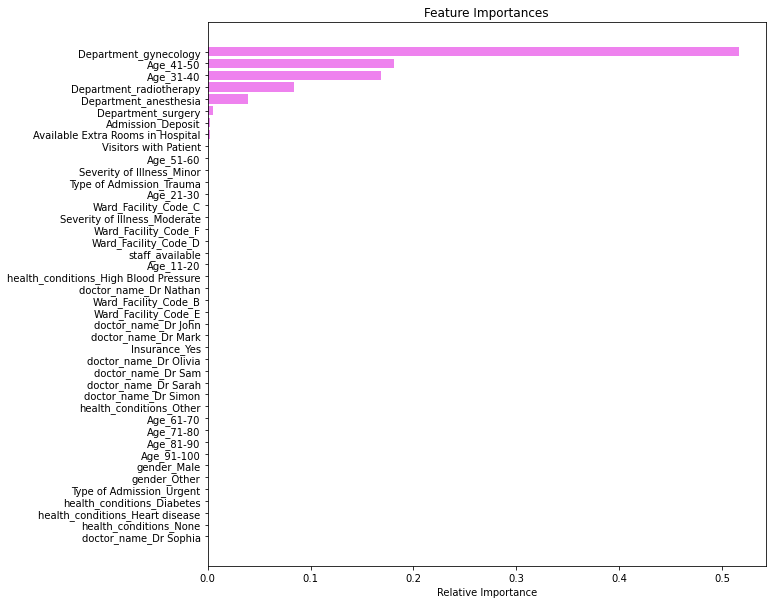

In [ ]:
# Plotting the feature importance
features = list(x.columns)
importances = dtree_tuned_regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

- **Department_gynecology, Age_41_50, and Age_31_40 are the most important features** followed by Department_anesthesia, Department_anesthesia, Department_surgery.
- The rest of the variables seem to have no impact in this model in terms of deciding the duration of the stay in the hospital.

### **Bagging Regressor**

In [ ]:
# Bagging Regressor
bagging_estimator=BaggingRegressor(random_state=1)

# Fitting the model
bagging_estimator.fit(x_train,y_train)

# Model Performance on test data i.e prediction
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, x_test, y_test)

bagging_estimator_perf_test

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  1.36894  0.905205   0.970242        0.970229  7.648842

### **Tuned Bagging Regressor**

In [ ]:
# Choose the type of regressor. 
bagging_tuned = BaggingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [10,15,20],
              "max_samples" : [0.8,1],
              "max_features" : [0.8,1]
             }


# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned , parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train,y_train)

# Set the bagging_tuned_regressor to the best combination of parameters
bagging_tuned_regressor = grid_obj.best_estimator_

bagging_tuned_regressor.fit(x_train, y_train)

BaggingRegressor(max_features=0.8, max_samples=0.8, n_estimators=15,
                 random_state=1)

In [ ]:
# Get the score of tuned Bagging tree regressor
bagging_tuned_regressor_perf_test = model_performance_regression(bagging_tuned_regressor, x_test, y_test)
bagging_tuned_regressor_perf_test

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  1.536988  1.032587   0.962487        0.962471  8.952246

**The bagging regressor has no attribute to calculate feature importance in Sklearn. So, let's move on to the next model.** 

### **Random Forest Regressor**

In [ ]:
# Random Forest Regressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the model
regressor.fit(x_train, y_train)

# Model Performance on test data i.e prediction
regressor_perf_test = model_performance_regression(regressor, x_test, y_test)

regressor_perf_test

RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  1.303684  0.86505   0.973011           0.973  7.314995

### **Tuned Random Forest**

**NOTE:** Due to the large number of observations in the data, the code in the next cell for GridSearchCV might take 1-2 hours to run depending on the configuration of your system.  

In [ ]:
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [5, 7],
    "max_features": [0.8, 1]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train,y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = grid_obj.best_estimator_

rf_tuned_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=110,
                      random_state=0)

In [ ]:
# Model Performance on test data i.e prediction
rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, x_test, y_test)

rf_tuned_regressor_perf_test

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  1.722618  1.156882   0.952878        0.952859  9.650161

**Observations:**

- The performance of the tuned model is actually lower in comparison to the model with default parameters. 
- This might be because we have tried a very small number of hyperparameters and a small number of values due to computational limits. We can certainly try to improve the performance of the model by tuning the model further.   

**Visualizing the feature importance**

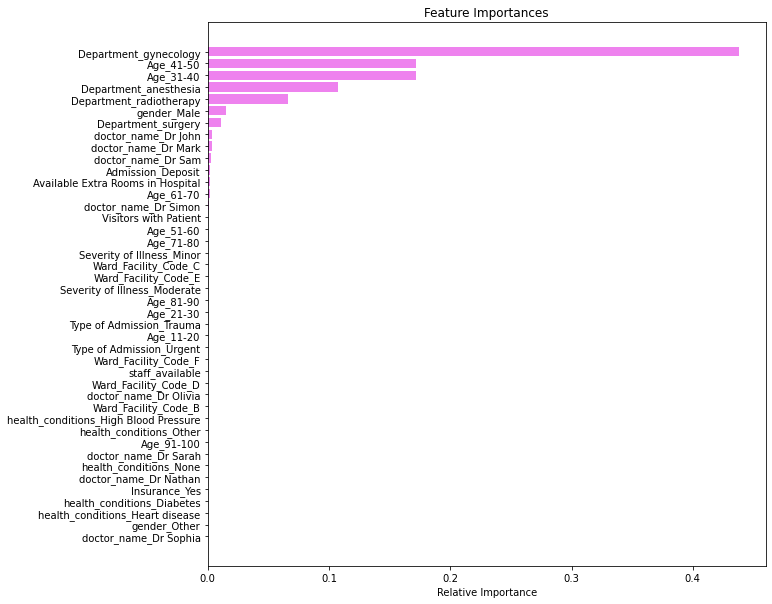

In [ ]:
# Plotting the feature importance
importances = rf_tuned_regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

- The top 3 important variables are the same as decision tree model. There are some other features like gender, and doctors adding some value to the model.

**Model Performance Comparison**

In [ ]:
models_test_comp_df = pd.concat(
    [
        dt_regressor_perf_test.T,
        regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        dtree_tuned_regressor_perf_test.T,
        bagging_tuned_regressor_perf_test.T,
        rf_tuned_regressor_perf_test.T
    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision tree regressor",
    "Random Forest regressor",
    "Bagging regressor",
    "Tuned Decision Tree regressor",
    "Tuned Bagging Tree regressor",
    "Tuned Random Forest Regressor"]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Decision tree regressor  Random Forest regressor  \
RMSE                           1.815150                 1.303684   
MAE                            1.128290                 0.865050   
R-squared                      0.947680                 0.973011   
Adj. R-squared                 0.947658                 0.973000   
MAPE                           9.341248                 7.314995   

                Bagging regressor  Tuned Decision Tree regressor  \
RMSE                     1.368940                       1.741743   
MAE                      0.905205                       1.161072   
R-squared                0.970242                       0.951826   
Adj. R-squared           0.970229                       0.951806   
MAPE                     7.648842                       9.646680   

                Tuned Bagging Tree regressor  Tuned Random Forest Regressor  
RMSE                                1.536988                       1.722618  
MAE                                 1.032587                       1.156882  
R-squared                           0.962487                       0.952878  
Adj. R-squared                      0.962471                       0.952859  
MAPE                                8.952246                       9.650161

**Observations:**

- All the models give good performance in terms of RMSE and R-squared. 
- The bagging and random forest regressors perform better than a single decision tree.
- The random forest model with default parameters is giving the best performance among all the trained models.

### **Fitting the final chosen model**

- Final Model Building - Random Forest Regressor
- We will consider Random Forest Regressor with default parameters as our final model.

In [ ]:
final_model = RandomForestRegressor(n_estimators = 100, random_state = 1)
final_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
final_model_perf_train = model_performance_regression(final_model, x_train, y_train)

In [ ]:
final_model_perf_train

RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.487743  0.321099   0.996195        0.996195  2.71949

* Both the R-squared and the Adjusted R squared of the model are approx 99.6% on the training data. This indicates that the model is able to explain approx full variance in the target variable using the independent variables.

* Let's do a quick performance check on the test data

In [ ]:
final_model_test_perf = model_performance_regression(regressor, x_test, y_test)
print("Test Performance:")
final_model_test_perf

Test Performance:


RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  1.303684  0.86505   0.973011           0.973  7.314995

* **The model gives a good performance on the test data as well** i.e. the model is giving a generalized performance.
* The units of both RMSE and MAE are the same, days in this case. But RMSE is greater than MAE because it penalizes the outliers more.
* **The MAE indicates that the model is able to predict the length of stay within a mean error of 1 day.**
* **MAPE of 7.31 on the test data indicates that the model can predict within ~7% of the actual length of stay of patients.** It might be slightly higher because we have outliers in the data. 

## **Observations**



1.   The Random Forest Regressor model gives the best results. It is successful in capturing ~98% of variations in the test data.
2.   MAE of 0.75 indicates that the model can succesfully predict the length of stay of a patient during admission with just an error of 1 day. 
3. Factors like visitors with **patient** and **admission deposit** plays an important role in the prediction.
4. Factors like **staff_available** and **extra rooms** has very less to do with the predition from the model.



## **Business Insights and Recommendations**

- Gynecology is the busiest department of the hospital and it handles 68.7% of the total number of patients. It needs ample resources and staff for the smooth functioning of the department.
- The number of visitors with the patients highly influences the length of stay of a patient. The maximum number of visitors can go up to 32 which is very high. A restriction can be imposed on this.
- 74.2% of the patients are female. Thus, resources need to be procured while keeping this figure in mind.
- A large number of patients (89.3%) of the patients are in trauma or emergency during admission. An increase in ambulances and emergency rooms can reduce the risk of casualties.
- Ward A has the patients who stay for the longest and the most serious patients. These wards can be equipped with more resources and staff to reduce the length of stay of these patients.
- Elderly patients (51-100) and children (1-10) stay for the longest. Extra attention to these age groups can lead to a faster discharge from the hospital.
- Wards D, E, and C have the most visitors with a patient. These wards will need more space and amenities like washrooms, shops, and lobbies for the visitors. Spaces can also be rented out to shop owners and advertisements to generate extra income.
- Finally, the Random Forest Regressor can predict the length of stay of the patient with just an error of 1 day. The hospital can use these predictions to allocate the resources and staff accordingly and reduce any kind of wastage. The hospital can also allocate the wards and doctors accordingly to optimize admissions even during emergencies.

## **Additional Content**

## **Boosting Models**

Let's now look at Boosting models, which along with Bagging models, are the state-of-the-art in Ensemble Machine Learning.

### **XGBoost**
- XGBoost stands for Extreme Gradient Boosting.
- XGBoost is a tree-based ensemble machine learning technique that improves prediction power and performance by improvising on the Gradient Boosting framework and incorporating some reliable approximation algorithms. It is widely utilized and routinely appears at the top of competition leaderboards in data science.


In [ ]:
# Installing the xgboost library using "pip' command.
!pip install xgboost

In [ ]:
# Importing the Random Forest Regressor and Bagging Regressor [Bagging]
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

# Importing the AdaBoostRegressor and GradientBoostingRegressor [Boosting]
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

# Importing the XGBReressor from the xgboost
from xgboost import XGBRegressor

In [ ]:
# Adaboost Regressor
adaboost_model = AdaBoostRegressor(random_state=1)

# Fitting the model
adaboost_model.fit(x_train,y_train)

# Model Performance on test data i.e prediction
adaboost_model_perf_test = model_performance_regression(adaboost_model, x_test, y_test)

adaboost_model_perf_test

RMSE      MAE  R-squared  Adj. R-squared       MAPE
0  2.375388  1.58689   0.910399        0.910362  13.623722

In [ ]:
# Gradient Boost Regressor
gbc = GradientBoostingRegressor(random_state=1)
gbc.fit(x_train,y_train)
gbc_perf_test = model_performance_regression(gbc, x_test, y_test)

In [ ]:
gbc_perf_test

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  1.792721  1.212749   0.948965        0.948944  10.247284

In [ ]:
# XGBoost Regressor
xgb = XGBRegressor(random_state=1, eval_metric='logloss')
xgb.fit(x_train,y_train)
xgb_perf_test = model_performance_regression(xgb, x_test, y_test)


In [ ]:
xgb_perf_test

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  1.510606  1.033003   0.963764        0.963748  8.867275

### **Hyperparameter Tuning: Boosting**

Hyperparameter tuning is a great technique in machine learning to develop the model that has the optimal parameters for that dataset. If the size of the data increases, the computation time will also increase during training process.

For practice purposes, we have listed below some of the important hyperparameters for each algorithm that can be tuned to improve the model performance.


**1. Adaboost**
- Some important hyperparameters that can be tuned:
  - **base_estimator** object, default=None
The base estimator from which the boosted ensemble is built. If None, then the base estimator is DecisionTreeRegressor initialized with max_depth=3.
  - **n_estimators** int, default=50
  The maximum number of estimators at which boosting is terminated. In the case of a perfect fit, the learning procedure is stopped early.
  - **loss :** {‚Äòlinear‚Äô, ‚Äòsquare‚Äô, ‚Äòexponential‚Äô}, default=‚Äôlinear‚Äô
The loss function to use when updating the weights after each boosting iteration.
 - **learning_rate** float, default=1.0
Weight applied to each regressor at each boosting iteration. A higher learning rate increases the contribution of each regressor.

**2. Gradient Boost**
- Some important hyperparameters that can be tuned:
   - **n_estimators**: the number of boosting stages that will be performed.

 - **max_depth**: limits the number of nodes in the tree. The best value depends on the interaction of the input variables.

  - **min_samples_split**: the minimum number of samples required to split an internal node.

  - **learning_rate**: how much the contribution of each tree will shrink.

  - **loss**: loss function to optimize. 

For a better understanding of each parameter in the Gradient Boosting Regressor, please refer to this [source](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor).



**3. XGBoost**
- Some important hyperparameters that can be tuned:
  - **booster** [default= gbtree ] Which booster to use. Can be gbtree, gblinear or dart; gbtree and dart use tree-based models while gblinear uses linear functions.
  - **min_child_weight** [default=1]

    The minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In the linear regression task, this simply corresponds to the minimum number of instances needed to be in each node. The larger min_child_weight is, the more conservative the algorithm will be.

  For a better understanding of each parameter in the XGBoost Regressor, please refer to this [source](https://xgboost.readthedocs.io/en/stable/parameter.html).

### **Comparison of all the models we have built so far**

In [ ]:
models_test_comp_df = pd.concat(
    [
        
        dt_regressor_perf_test.T,
        regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        adaboost_model_perf_test.T,
        gbc_perf_test.T,
        xgb_perf_test.T

    ],
    axis=1,
)

models_test_comp_df.columns = [
 
    "Decision tree regressor",
    "Random Forest regressor",
    "Bagging regressor",
    "Adaboost regressor",
    "Gradientboost regressor",
    "XGBoost regressor"
]

print("Test performance comparison:")

Test performance comparison:


In [ ]:
models_test_comp_df

Decision tree regressor  Random Forest regressor  \
RMSE                           1.815720                 1.303579   
MAE                            1.129500                 0.864338   
R-squared                      0.947647                 0.973015   
Adj. R-squared                 0.947625                 0.973004   
MAPE                           9.339586                 7.310845   

                Bagging regressor  Adaboost regressor  \
RMSE                     1.368940            2.375388   
MAE                      0.905205            1.586890   
R-squared                0.970242            0.910399   
Adj. R-squared           0.970229            0.910362   
MAPE                     7.648842           13.623722   

                Gradientboost regressor  XGBoost regressor  
RMSE                           1.792721           1.510606  
MAE                            1.212749           1.033003  
R-squared                      0.948965           0.963764  
Adj. R-squared                 0.948944           0.963748  
MAPE                          10.247284           8.867275

**Observations :**

* With default parameters, the bagging methods outperform the boosting methods.
* The Random Forest Regressor is the model that gives the best score for this dataset.